In [2]:
from ast import increment_lineno
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/movies.csv")

In [4]:
import numpy as np

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{}-{}%'.format(col,pct_missing*100))

name-0.0%
rating-1.004173187271779%
genre-0.0%
year-0.0%
released-0.02608242044861763%
score-0.03912363067292645%
votes-0.03912363067292645%
director-0.0%
writer-0.03912363067292645%
star-0.013041210224308816%
country-0.03912363067292645%
budget-28.31246739697444%
gross-2.464788732394366%
company-0.2217005738132499%
runtime-0.05216484089723526%


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [7]:
df['year_correct']=df['released'].astype(str).str[:4]

In [20]:
from datetime import datetime
import re
df['year_corrected'] = None

for index, date_str in enumerate(df['released']):
    if pd.notna(date_str):  # Check if the value is not NaN
        # Use regular expression to extract the year
        match = re.search(r'\b\d{4}\b', str(date_str))

        if match:
            year = int(match.group())
            # Assign the extracted year to the 'year_corrected' column
            df.at[index, 'year_corrected'] = year
        else:
            print(f"Failed to parse the date: {date_str}")
    else:
        print("Date is NaN")

# Print the DataFrame with the new 'year_corrected' column
print(df)

Date is NaN
Date is NaN
                                                name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

               

In [21]:
df = df.drop('year_correct', axis=1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [23]:
df.sort_values(by=['gross'],inplace = False,ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [27]:
# drop any duplicates
df = df.drop_duplicates()

Text(0, 0.5, 'Budget')

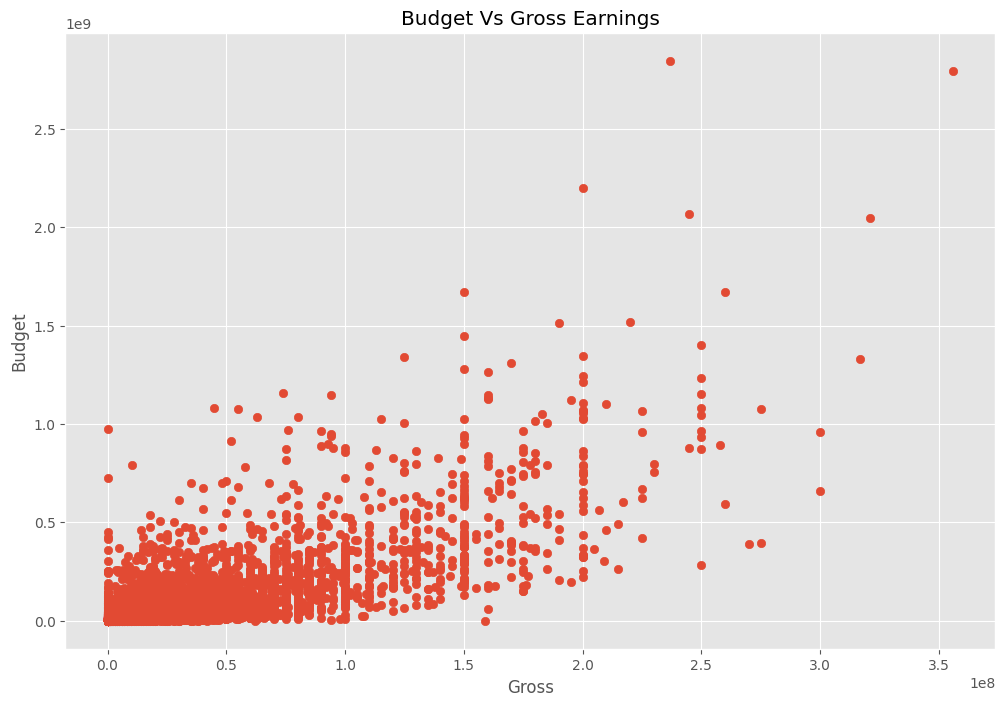

In [30]:
plt.scatter(x = df['budget'],y = df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Gross')
plt.ylabel('Budget')

<Axes: xlabel='budget', ylabel='gross'>

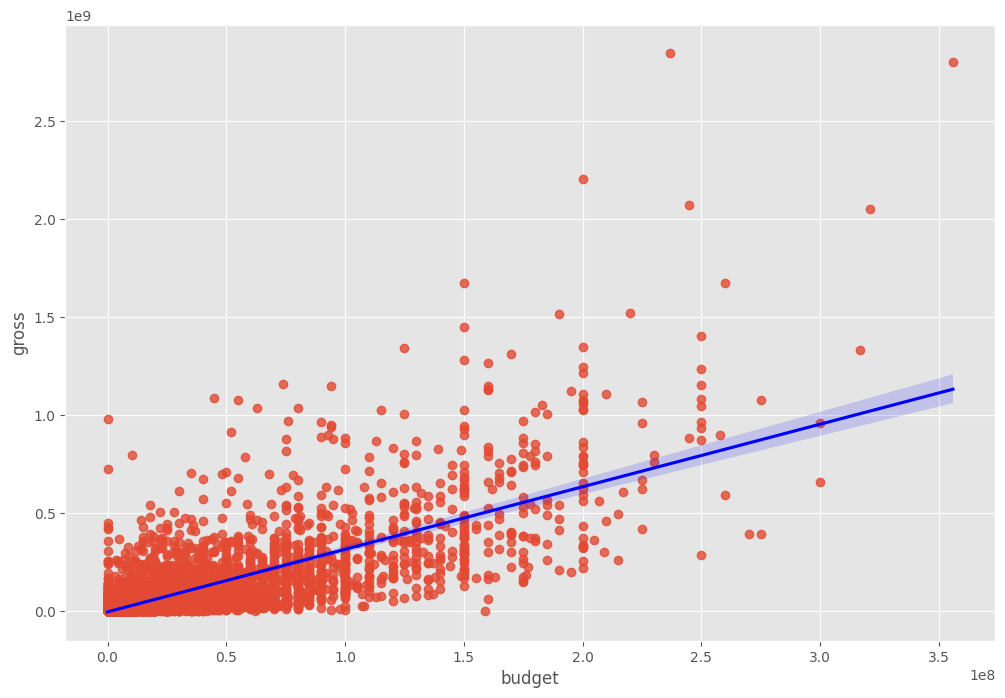

In [33]:
sns.regplot(x = 'budget',y = 'gross',data = df,line_kws={'color':'blue'})

In [34]:
df.corr()#correlation but only works on numerical fields
#method can the pearson,kendall,spearman

<ipython-input-34-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


<ipython-input-36-de1fb03218c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


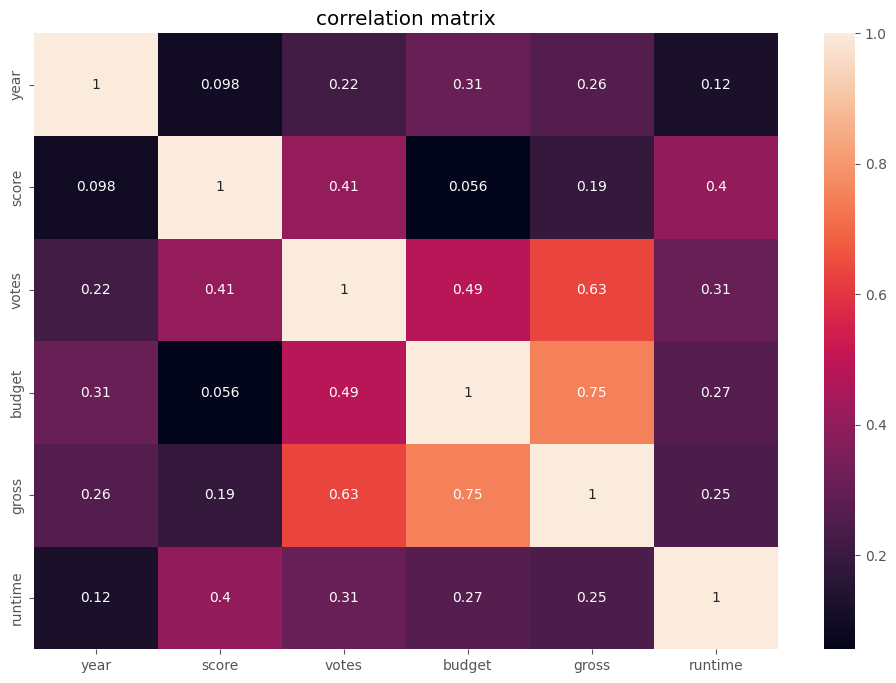

In [36]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot = True)
plt.title('correlation matrix')
plt.show()

In [ ]:
#encoding the classes
df_numerized = df

for col in df_numerized.columns:
  if (df_numerized[col].dtype =='object'):
    df_numerized[col]=df_numerized[col].astype('category')
    df_numerized[col]=df_numerized[col].cat.codes

df_numerized

Text(120.58159722222221, 0.5, 'movie_features')

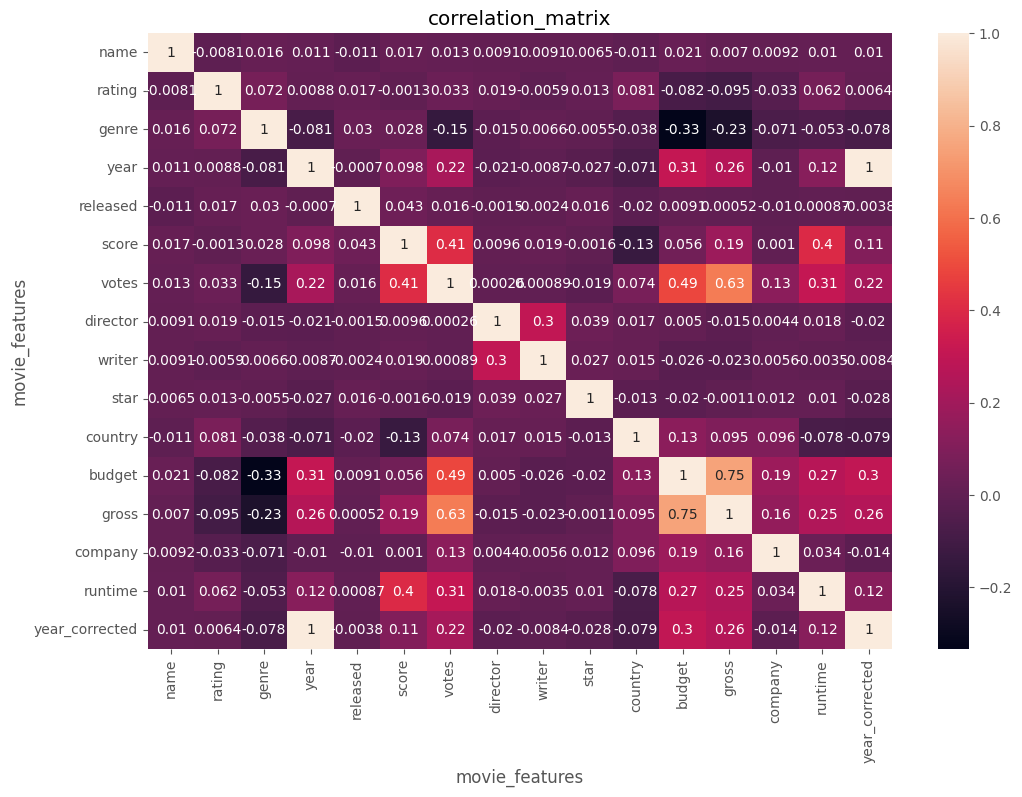

In [42]:
corr_matrix = df_numerized.corr()
sns.heatmap(corr_matrix,annot = True)
plt.title('correlation_matrix')
plt.xlabel('movie_features')
plt.ylabel('movie_features')

In [44]:
corr_pairs = corr_matrix.unstack()
corr_pairs

name            name              1.000000
                rating           -0.008069
                genre             0.016355
                year              0.011453
                released         -0.011311
                score             0.017097
                votes             0.013088
                director          0.009079
                writer            0.009081
                star              0.006472
                country          -0.010737
                budget            0.020548
                gross             0.006989
                company           0.009211
                runtime           0.010392
                year_corrected    0.010225
rating          name             -0.008069
                rating            1.000000
                genre             0.072423
                year              0.008779
                released          0.016613
                score            -0.001314
                votes             0.033225
           

In [45]:
sorted_pairs = corr_pairs.sort_values()


budget          genre            -0.334021
genre           budget           -0.334021
                gross            -0.234297
gross           genre            -0.234297
votes           genre            -0.145307
genre           votes            -0.145307
score           country          -0.133348
country         score            -0.133348
rating          gross            -0.095450
gross           rating           -0.095450
budget          rating           -0.081939
rating          budget           -0.081939
genre           year             -0.081261
year            genre            -0.081261
country         year_corrected   -0.079009
year_corrected  country          -0.079009
runtime         country          -0.078412
country         runtime          -0.078412
year_corrected  genre            -0.078210
genre           year_corrected   -0.078210
                company          -0.071067
company         genre            -0.071067
year            country          -0.070938
country    

In [52]:
high_corr = sorted_pairs[(sorted_pairs>0.5)]
high_corr


gross           votes             0.632834
votes           gross             0.632834
gross           budget            0.750157
budget          gross             0.750157
year_corrected  year              0.996397
year            year_corrected    0.996397
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

In [51]:
corrected_corr = high_corr[high_corr!=1]
corrected_corr

gross           votes             0.632834
votes           gross             0.632834
gross           budget            0.750157
budget          gross             0.750157
year_corrected  year              0.996397
year            year_corrected    0.996397
dtype: float64

In [ ]:
#analysis methods

In [53]:
print(df.describe())


              name       rating        genre         year     released  \
count  7668.000000  7668.000000  7668.000000  7668.000000  7668.000000   
mean   3755.946531     5.137976     3.633281  2000.405451  1698.907407   
std    2164.610796     1.300140     2.759259    11.153508   993.056332   
min       0.000000    -1.000000     0.000000  1980.000000    -1.000000   
25%    1889.750000     5.000000     1.000000  1991.000000   852.750000   
50%    3763.500000     5.000000     4.000000  2000.000000  1696.000000   
75%    5628.250000     6.000000     6.000000  2010.000000  2593.000000   
max    7511.000000    11.000000    18.000000  2020.000000  3413.000000   

             score         votes     director       writer         star  \
count  7665.000000  7.665000e+03  7668.000000  7668.000000  7668.000000   
mean      6.390411  8.810850e+04  1516.120762  2292.102765  1403.862676   
std       0.968842  1.633238e+05   854.409880  1307.365576   815.264518   
min       1.900000  7.000000e+00 

In [60]:
df1 = pd.read_csv("/content/drive/MyDrive/movies.csv")
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [62]:
average_rating_by_genre = df.groupby('genre')['rating'].mean().sort_values(ascending=False)
print(average_rating_by_genre)

genre
11    6.000000
5     5.693285
10    5.652174
13    5.650000
17    5.437500
8     5.363636
18    5.333333
0     5.310264
3     5.275395
4     5.174165
6     5.163373
16    5.000000
1     4.519906
15    4.300000
14    3.500000
2     3.236686
7     2.727273
12    1.000000
9    -1.000000
Name: rating, dtype: float64


In [57]:
movies_by_country = df['country'].value_counts()
print(movies_by_country)


 55    5475
 54     816
 14     279
 6      190
 15     117
 2       92
 27      81
 20      62
 25      61
 47      47
 17      45
 23      43
 8       40
 45      35
 11      32
 48      25
 34      25
 32      22
 33      12
 35      12
 57      12
 49      10
 22      10
 44       8
 10       8
 4        8
 42       8
 0        8
 50       7
 18       6
 51       6
 5        6
 58       5
 3        5
 24       5
 38       4
 52       3
-1        3
 13       3
 37       3
 21       2
 53       2
 19       2
 46       2
 7        2
 16       2
 12       2
 56       2
 39       2
 36       1
 31       1
 28       1
 1        1
 43       1
 41       1
 9        1
 30       1
 26       1
 40       1
 29       1
Name: country, dtype: int64


In [64]:
movies_by_country = df1['country'].value_counts()
print(movies_by_country)


United States                     5475
United Kingdom                     816
France                             279
Canada                             190
Germany                            117
Australia                           92
Japan                               81
India                               62
Italy                               61
Spain                               47
Hong Kong                           45
Ireland                             43
China                               40
South Korea                         35
Denmark                             32
Sweden                              25
New Zealand                         25
Mexico                              22
Norway                              12
West Germany                        12
Netherlands                         12
Iran                                10
Switzerland                         10
Russia                               8
Belgium                              8
Argentina                

In [67]:
top_directors = df1.groupby('director')['score'].mean().sort_values(ascending=False)
print(top_directors.head)


<bound method NDFrame.head of director
Olivier Nakache                     8.500000
Anurag Kashyap                      8.500000
Marco Tullio Giordana               8.500000
Aamir Khan                          8.400000
Sergio Leone                        8.400000
Bob Persichetti                     8.400000
Nadine Labaki                       8.400000
Nitesh Tiwari                       8.350000
Tengiz Abuladze                     8.300000
Moustapha Akkad                     8.300000
Tom Logan                           8.300000
Lee Unkrich                         8.300000
Rajkumar Hirani                     8.250000
Majid Majidi                        8.250000
Jerry Mitchell                      8.200000
Vikramaditya Motwane                8.200000
Sriram Raghavan                     8.200000
Juan José Campanella                8.200000
Béla Tarr                           8.200000
Nishikant Kamat                     8.200000
Christopher Nolan                   8.163636
Rakeysh Omprakas

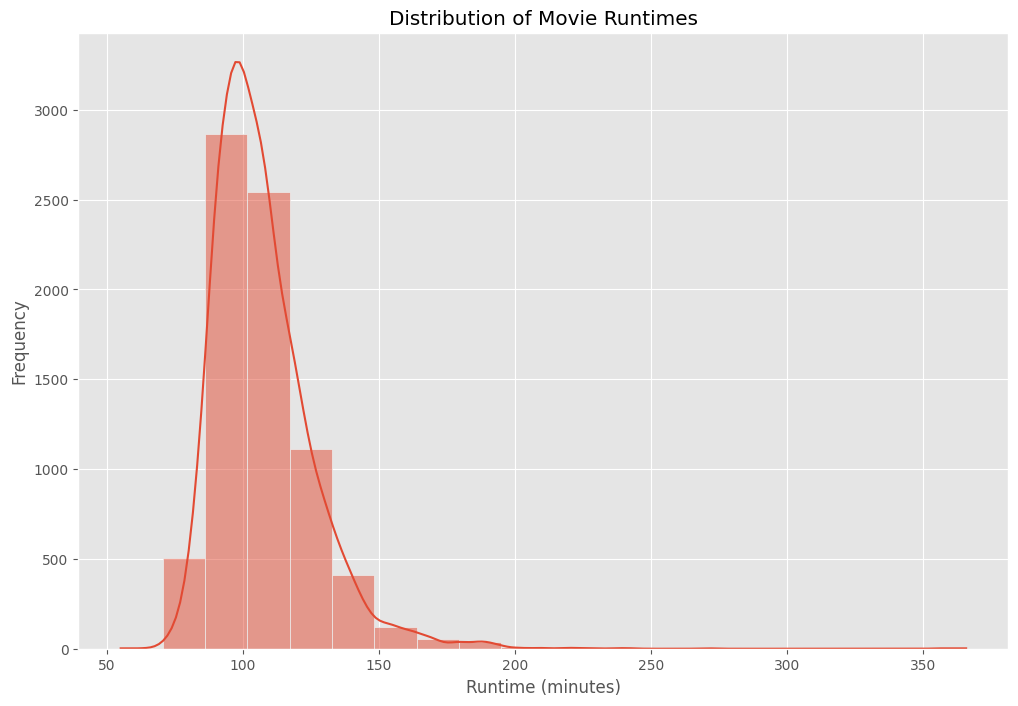

In [69]:
import seaborn as sns

sns.histplot(df['runtime'], bins=20, kde=True)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()


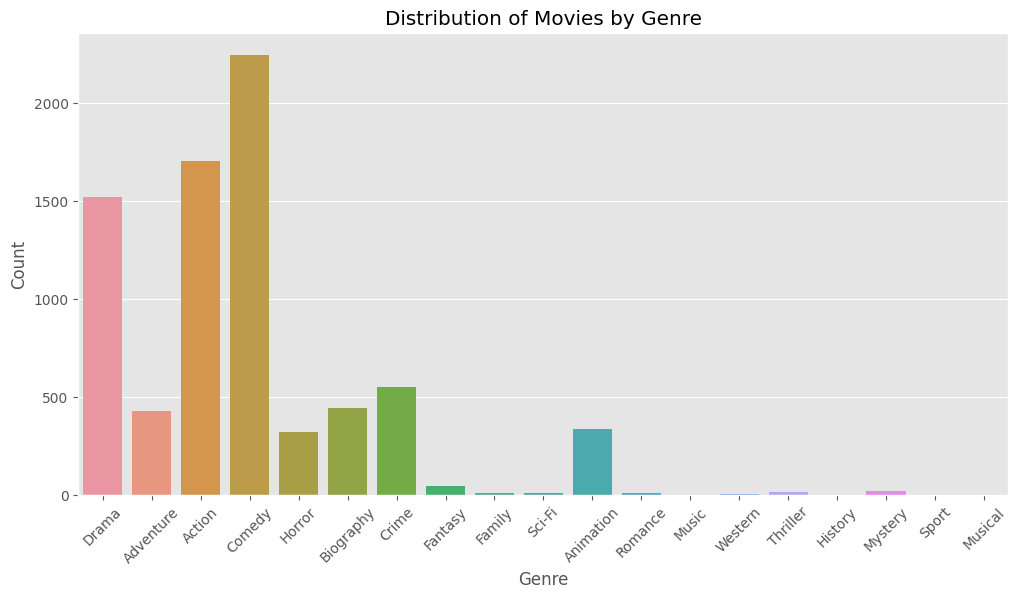

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=df1)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movies by Genre')
plt.xticks(rotation=45)
plt.show()

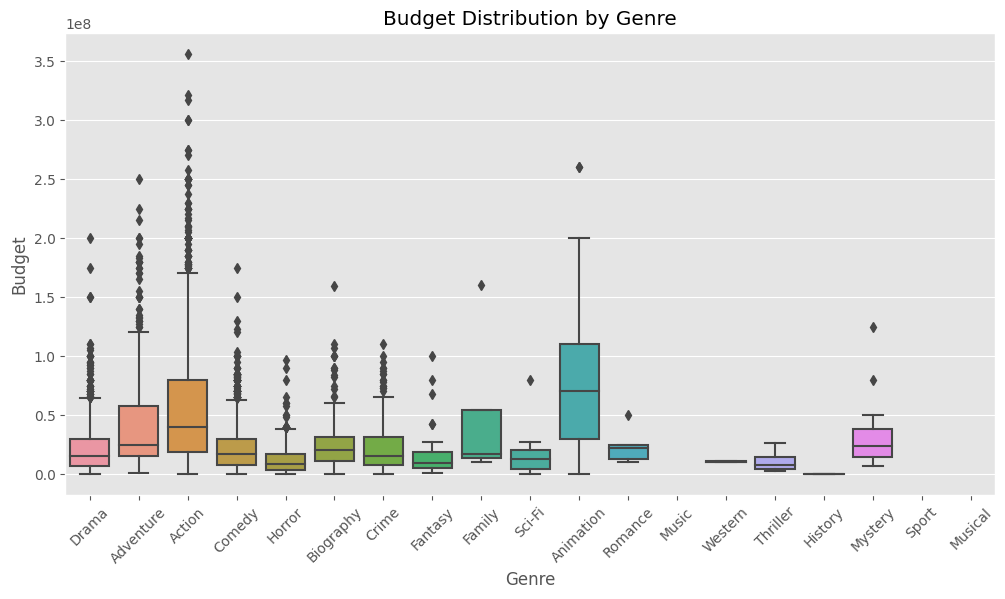

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='budget', data=df1)
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Budget Distribution by Genre')
plt.xticks(rotation=45)
plt.show()


In [74]:
director_contribution = df1.groupby('director')['gross'].sum() / df['gross'].sum()
print(director_contribution.sort_values(ascending=False))

director
Steven Spielberg                    1.640088e-02
Anthony Russo                       1.165761e-02
Peter Jackson                       1.127233e-02
Michael Bay                         1.098898e-02
James Cameron                       1.064219e-02
David Yates                         1.025640e-02
Christopher Nolan                   8.777890e-03
J.J. Abrams                         7.936180e-03
Tim Burton                          7.590371e-03
Ron Howard                          7.510044e-03
Jon Favreau                         7.434227e-03
Robert Zemeckis                     7.301436e-03
Chris Columbus                      7.039648e-03
Ridley Scott                        6.824524e-03
Roland Emmerich                     6.589381e-03
Gore Verbinski                      6.392419e-03
Bryan Singer                        6.350566e-03
James Wan                           6.320245e-03
Brad Bird                           5.836943e-03
Francis Lawrence                    5.729251e-03
Sam Raimi  